initial ahat [[-1.53446079e-05 -1.20026288e-04 -4.65027658e-05]
 [ 1.36920892e-05  2.61152610e-04  5.27292748e-05]
 [-4.38171966e-06  3.82651878e-05 -3.01394851e-05]]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


matrix result comparison
[[ 0.13612483  0.31983509  0.38781205]
 [ 0.18569178  0.31275156  0.77053517]
 [ 0.18395131 -0.15944918  1.04526958]]
[[1.e+00 1.e-03 5.e-07]
 [0.e+00 1.e+00 1.e-03]
 [0.e+00 0.e+00 1.e+00]]
(1500, 3)


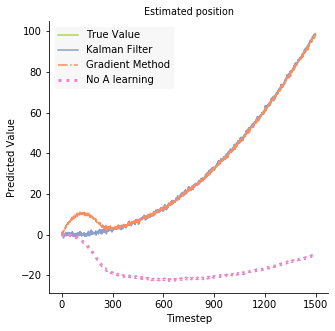

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


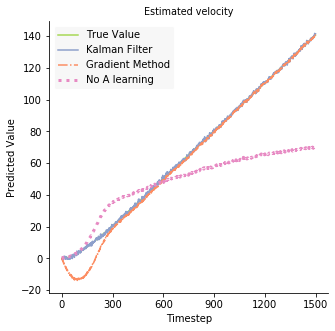

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


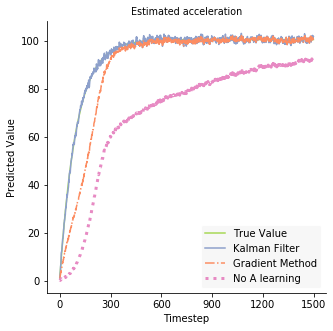

In [84]:
!pip install brewer2mpl
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import matplotlib as mp
import brewer2mpl
import seaborn as sns

bmap = brewer2mpl.get_map("Set2", 'qualitative',7)
colors = bmap.mpl_colors

params = {
   'axes.labelsize': 8,
   'font.size': 8,
   'legend.fontsize': 10,
   'xtick.labelsize': 10,
   'ytick.labelsize': 10,
   'text.usetex': False,
   'figure.figsize': [5, 5],
   'font.family': 'sans-serif'
   }
mp.rcParams.update(params)

dt = 0.001
A = np.array([[1, dt, 0.5 * dt**2],
     [0,1,dt],
     [0,0,1]])
x = np.array([0,0,0])
#C = np.identity(3)
C = np.random.normal(0,1,[3,3])
def u_fun(t):
  return np.exp(-0.01 * t)

us = []
xs = []
ys = []
B = np.array([0,0,1])
xhat = np.array([0.0,0.0,0.0])
phat = np.identity(3)
Q = np.identity(3)
R = np.identity(3)
xhats = []
phats = []
xhat_grad = xhat
xhat_grad_no_ahat = np.copy(xhat_grad)
phat_grad = np.copy(phat)
xhat_grads = []
Ahat = np.random.normal(0,0.0001,[3,3])
Chat = np.random.normal(0,1,[3,3])
init_Ahat = np.copy(Ahat)
no_ahats = []
print("initial ahat", Ahat)
for i in range(1500):
  u = u_fun(i)
  x = np.dot(A,x) + np.dot(B,u) #+ np.random.normal(0,0.1,3)
  y = np.dot(C, x) + np.random.normal(0,1,3)
  xhat_proj = np.dot(A,xhat) + np.dot(B,u)
  phat_proj = np.dot(A, np.dot(phat, A.T)) + Q
  K = np.dot(np.dot(phat_proj, C.T), LA.inv(np.dot(np.dot(C,phat_proj),C.T) + R))
  xhat = xhat_proj + np.dot(K, y - np.dot(C,xhat_proj))
  phat = phat_proj - np.dot(K, np.dot(C, phat_proj))
  for i in range(20):
    ex = xhat_grad - (np.dot(Ahat, xhat_grad) + np.dot(B,u))
    ey = y - np.dot(C, xhat_grad)
    dldmu = np.dot(phat_grad, ex) - np.dot(C.T, np.dot(R, ey))
    xhat_grad -= (0.05 * dldmu)

    Ahat_grad=   np.dot(phat,np.dot(ex.reshape(3,1), xhat_grad.reshape(3,1).T))
    Ahat += 0.0000005 * Ahat_grad

  #without the ahat
  for i in range(20):
    ex_no_ahat = xhat_grad - (np.dot(init_Ahat, xhat_grad) + np.dot(B,u))
    ey_no_ahat = y - np.dot(C, xhat_grad)
    dldmu_no_ahat = np.dot(phat_grad, ex) - np.dot(C.T, np.dot(R, ey))
    xhat_grad_no_ahat -= (0.05 * dldmu)

    #Ahat_grad=   np.dot(phat,np.dot(ex.reshape(3,1), xhat_grad.reshape(3,1).T))
    #Ahat += 0.0000001 * Ahat_grad


  xs.append(x)
  us.append(u)
  ys.append(y)
  xhats.append(xhat)
  phats.append(phat)
  xhat_grads.append(np.copy(xhat_grad))
  no_ahats.append(np.copy(xhat_grad_no_ahat))

def plot_A_matrix_graph(xs, xhats, xhat_grads, no_ahats, title):
  plt.plot(xs,label="True Value",color=colors[4])
  plt.plot(xhats, label="Kalman Filter",color=colors[2])
  plt.plot(xhat_grads, label="Gradient Method", linestyle='-.',color=colors[1])
  plt.plot(no_ahats, label="No A learning",linewidth=3, linestyle=":",color=colors[3])
  plt.title(title)
  leg = plt.legend()
  f = leg.get_frame()
  f.set_edgecolor('1')
  f.set_facecolor('0.96')
  plt.xticks(np.arange(0,1510,300))
  plt.xlabel('Timestep',fontsize=10)
  plt.ylabel("Predicted Value",fontsize=10)
  sns.despine(left=False,top=True, right=True, bottom=False)
  plt.savefig(title + "_A_matrix.eps", format="eps")
  plt.show()

xs = np.array(xs)
print("matrix result comparison")
print(Ahat)
print(A)
xhats = np.array(xhats)
xhat_grads = np.array(xhat_grads)
no_ahats = np.array(no_ahats)
print(xs.shape)
plot_A_matrix_graph(xs[:,0], xhats[:,0], xhat_grads[:,0], no_ahats[:,0],"Estimated position")
plot_A_matrix_graph(xs[:,1], xhats[:,1], xhat_grads[:,1], no_ahats[:,1],"Estimated velocity")
plot_A_matrix_graph(xs[:,2], xhats[:,2], xhat_grads[:,2], no_ahats[:,2],"Estimated acceleration")


In [85]:
!ls
from google.colab import files
files.download("Estimated acceleration_A_matrix.eps")
files.download("Estimated velocity_A_matrix.eps")
files.download("Estimated position_A_matrix.eps")

'Estimated acceleration_A_matrix.eps'   sample_data
'Estimated position_A_matrix.eps'       test_graph.eps
'Estimated velocity_A_matrix.eps'
